In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
warnings.simplefilter("ignore")

### 1) Загрузите прилагающийся датасет.

In [42]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2) Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.

In [43]:
df.isna().sum(axis=0) #пустых нет

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 3) Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

Построим графическую интерпретацию значений датасета. В качестве x-координаты возьмем годовой доход, а в качестве y-координаты оценку трат.

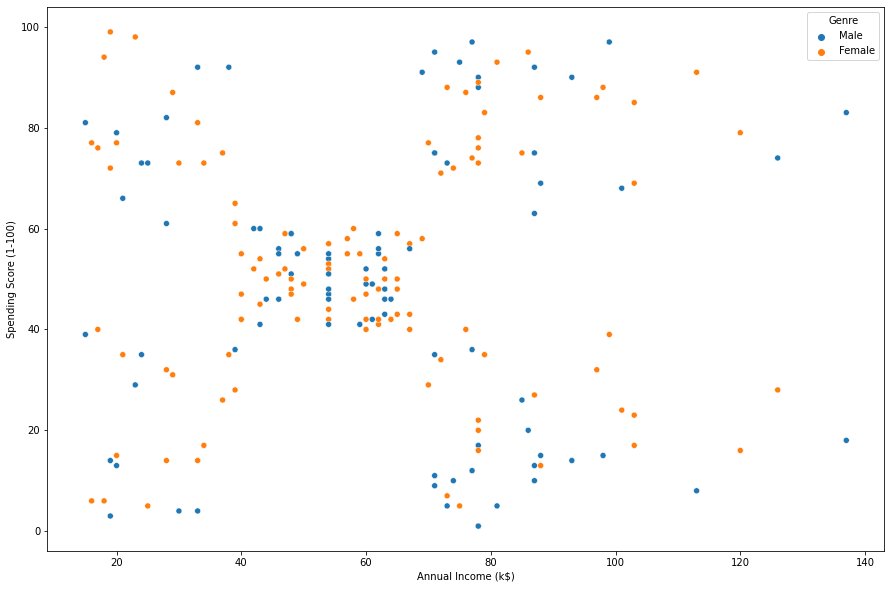

In [44]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income (k$)' , y = 'Spending Score (1-100)',data=df , hue='Genre');

### 4) Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


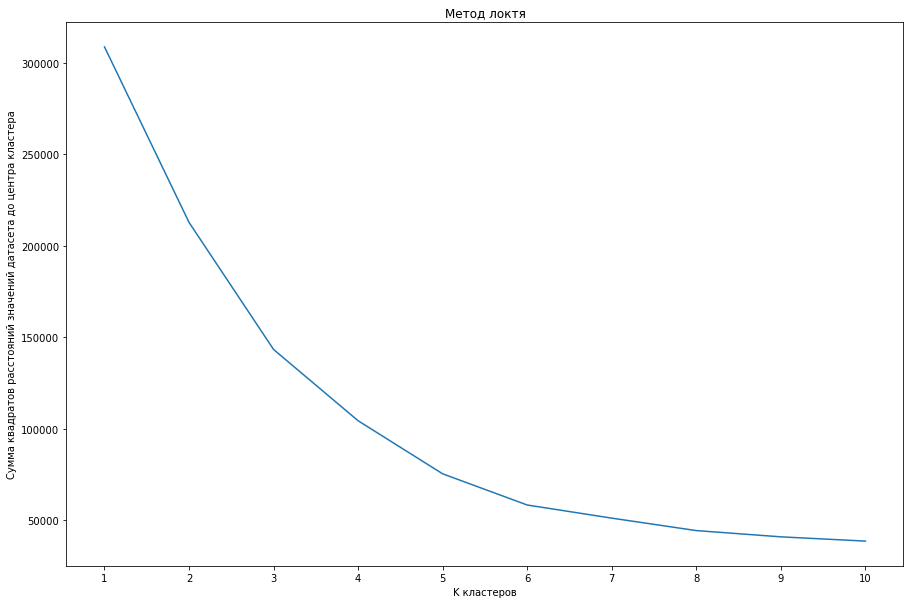

In [52]:
x = df.iloc[:,2:]
wcss = []
plt.figure(figsize=(15,10));
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(x)
    wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11));
plt.title('Метод локтя')
plt.xlabel('K кластеров')
plt.ylabel('Сумма квадратов расстояний значений датасета до центра кластера');

### 5) Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [53]:
kmeans = KMeans(n_clusters = 5) #init = 'k-means++', max_iter = 300, n_init = 10
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

### 6) Построить графическую интерпретацию из пункта 3, с центрами кластеров.

In [54]:
x.columns = ["Age", "Income", "Score"]

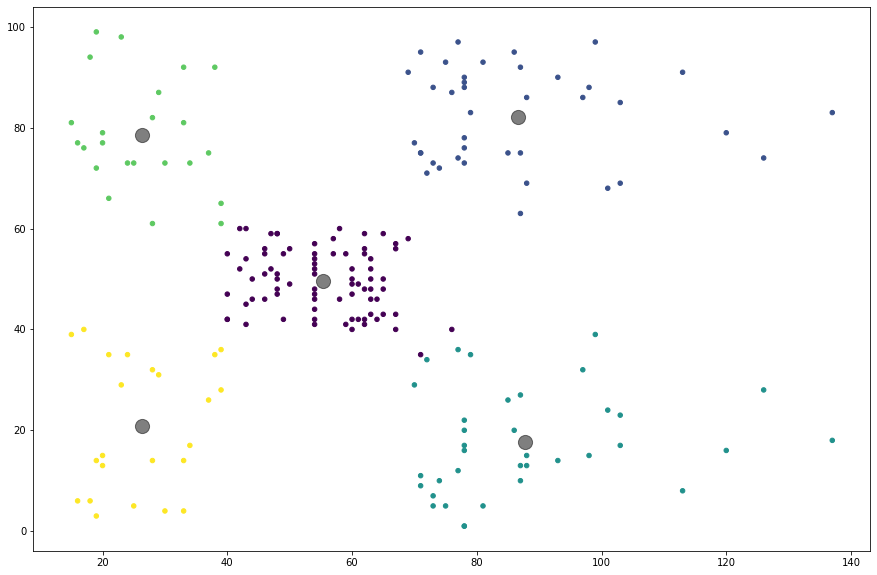

In [58]:
plt.figure(figsize=(15,10));
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


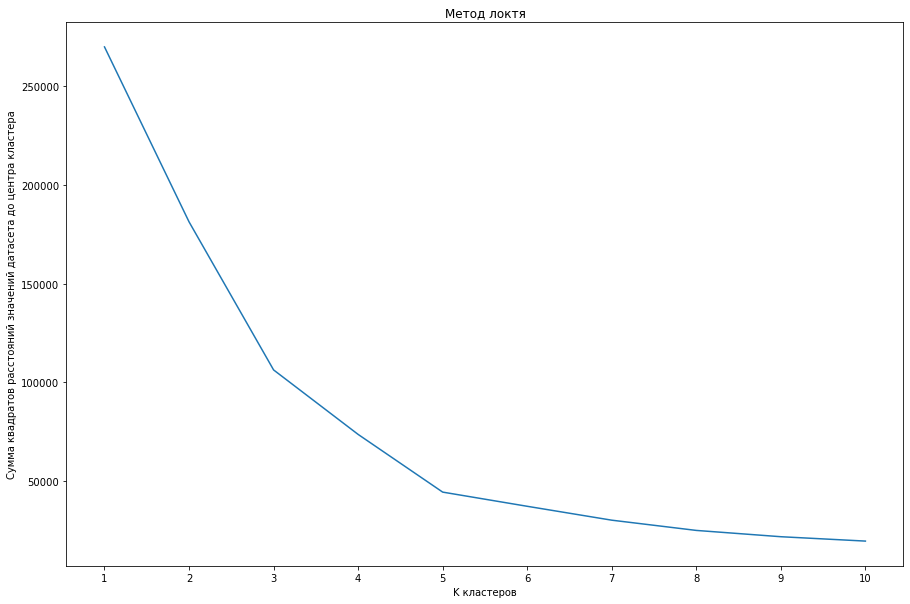

In [63]:
x2 = df.iloc[:,3:]
wcss = []
plt.figure(figsize=(15,10));
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(x2)
    wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11));
plt.title('Метод локтя')
plt.xlabel('K кластеров')
plt.ylabel('Сумма квадратов расстояний значений датасета до центра кластера');

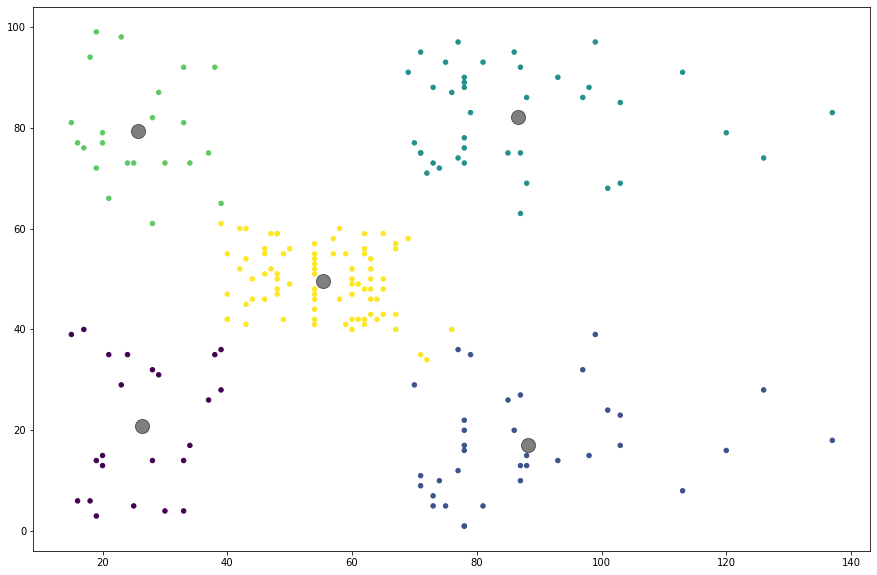

In [64]:
kmeans2 = KMeans(n_clusters = 5) #init = 'k-means++', max_iter = 300, n_init = 10
y_kmeans2 = kmeans2.fit_predict(x2)
x2.columns = ["Income", "Score"]
plt.figure(figsize=(15,10));
plt.scatter(x2.Income, x2.Score, c=y_kmeans2, s=20, cmap='viridis')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5);

### 7) Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

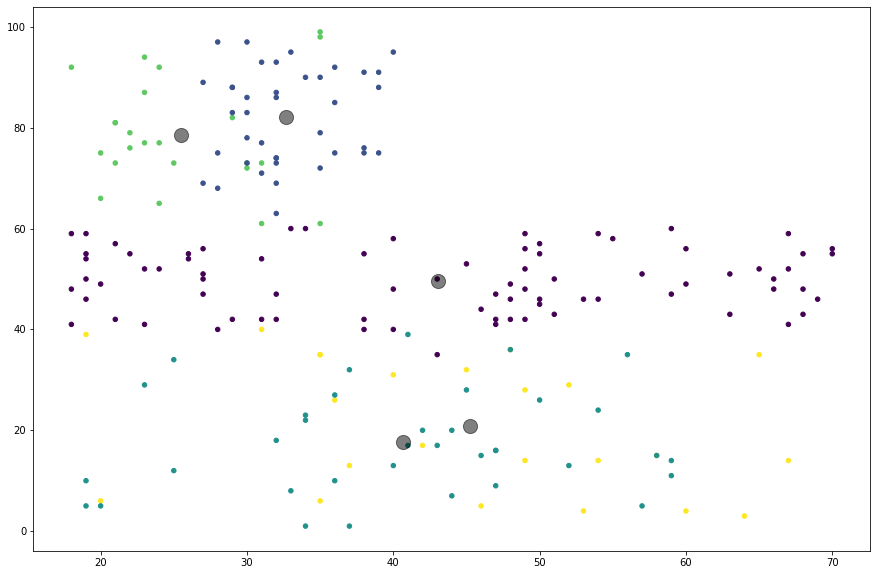

In [59]:
plt.figure(figsize=(15,10));
plt.scatter(x.Age, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


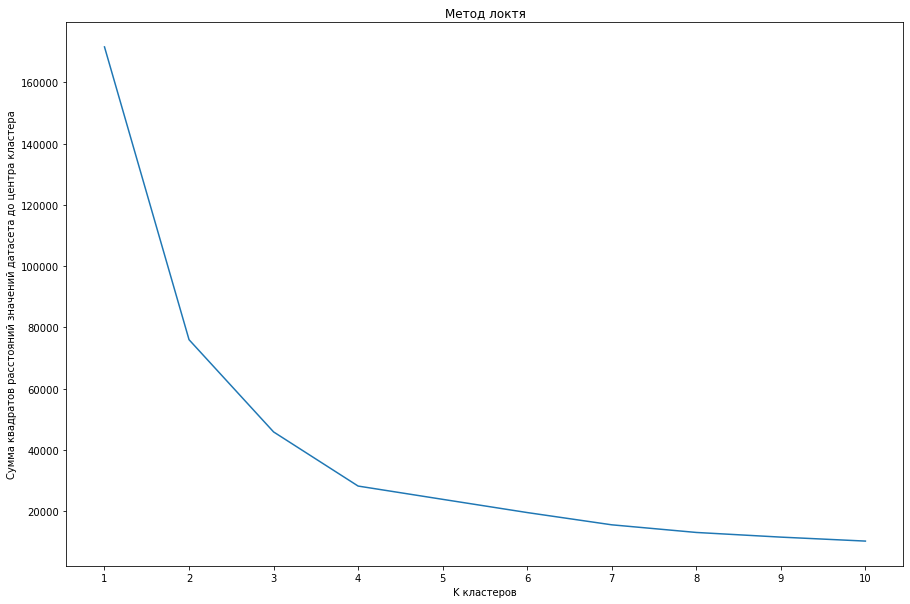

In [66]:
x3 = df.iloc[:,[2,4]]
wcss = []
plt.figure(figsize=(15,10));
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(x3)
    wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11));
plt.title('Метод локтя')
plt.xlabel('K кластеров')
plt.ylabel('Сумма квадратов расстояний значений датасета до центра кластера');

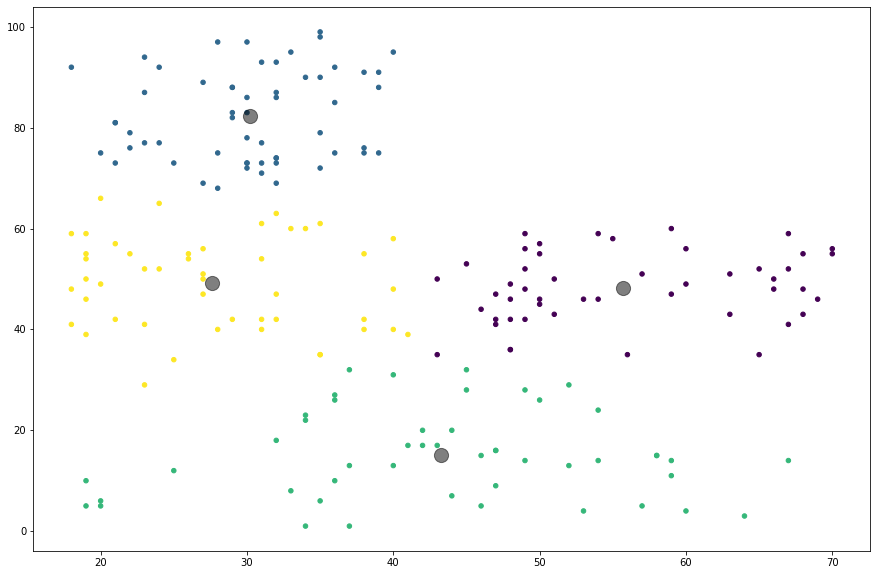

In [67]:
kmeans3 = KMeans(n_clusters = 4) #init = 'k-means++', max_iter = 300, n_init = 10
y_kmeans3 = kmeans3.fit_predict(x3)
x3.columns = ["Age", "Score"]
plt.figure(figsize=(15,10));
plt.scatter(x3.Age, x3.Score, c=y_kmeans3, s=20, cmap='viridis')
centers3 = kmeans3.cluster_centers_
plt.scatter(centers3[:, 0], centers3[:, 1], c='black', s=200, alpha=0.5);

### 8) Оцените модель с помощью метрик.

##### silhouette_score
Коэффициент силуэта рассчитывается с использованием среднего расстояния внутри кластера ( a) и среднего расстояния до ближайшего кластера ( b) для каждой выборки. Коэффициент силуэта для образца равен . Чтобы уточнить, это расстояние между образцом и ближайшим кластером, частью которого образец не является. Обратите внимание, что коэффициент силуэта определяется только в том случае, если количество этикеток равно .(b - a) / max(a, b)b2 <= n_labels <= n_samples - 1

Эта функция возвращает средний коэффициент силуэта по всем образцам. Чтобы получить значения для каждого образца, используйте silhouette_samples.

Лучшее значение равно 1, а худшее значение равно -1. Значения около 0 указывают на перекрывающиеся кластеры. Отрицательные значения обычно указывают на то, что образец был отнесен к неправильному кластеру, так как другой кластер более похож.

##### calinski_harabasz_score
Вычислите оценку Калински и Харабаша.

Он также известен как критерий отношения дисперсии.

Оценка определяется как отношение суммы межкластерной дисперсии и внутрикластерной дисперсии.

Если основные метки истинности неизвестны, для оценки модели можно использовать индекс Калински-Харабаса ( sklearn.metrics.calinski_harabasz_score), также известный как критерий отношения дисперсии, где более высокий показатель Калински-Харабаса относится к модели с более четко определенными кластерами.

Индекс представляет собой отношение суммы дисперсии между кластерами и внутрикластерной дисперсии для всех кластеров (где дисперсия определяется как сумма квадратов расстояний):

In [71]:
print("silhouette_score:", silhouette_score(x,  y_kmeans))
print("calinski_harabasz_score:", calinski_harabasz_score(x,  y_kmeans))

silhouette_score: 0.44428597560893024
calinski_harabasz_score: 151.04386000160667


In [72]:
print("silhouette_score:", silhouette_score(x2,  y_kmeans2))
print("calinski_harabasz_score:", calinski_harabasz_score(x2,  y_kmeans2))

silhouette_score: 0.553931997444648
calinski_harabasz_score: 247.35899338037282


In [73]:
print("silhouette_score:", silhouette_score(x3,  y_kmeans3))
print("calinski_harabasz_score:", calinski_harabasz_score(x3,  y_kmeans3))

silhouette_score: 0.49973941540141753
calinski_harabasz_score: 332.5631268443306


### 9) Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

##### по 3 признакам

In [104]:
n_clusters = list(range(2,30))
s_scores = []
c_scores = []

for clstrs in n_clusters:    
    kmeansx = KMeans(n_clusters=clstrs)
    y_kmeansx = kmeansx.fit_predict(x)

    s_scores.append(silhouette_score(x, y_kmeansx))
    c_scores.append(calinski_harabasz_score(x, y_kmeansx))

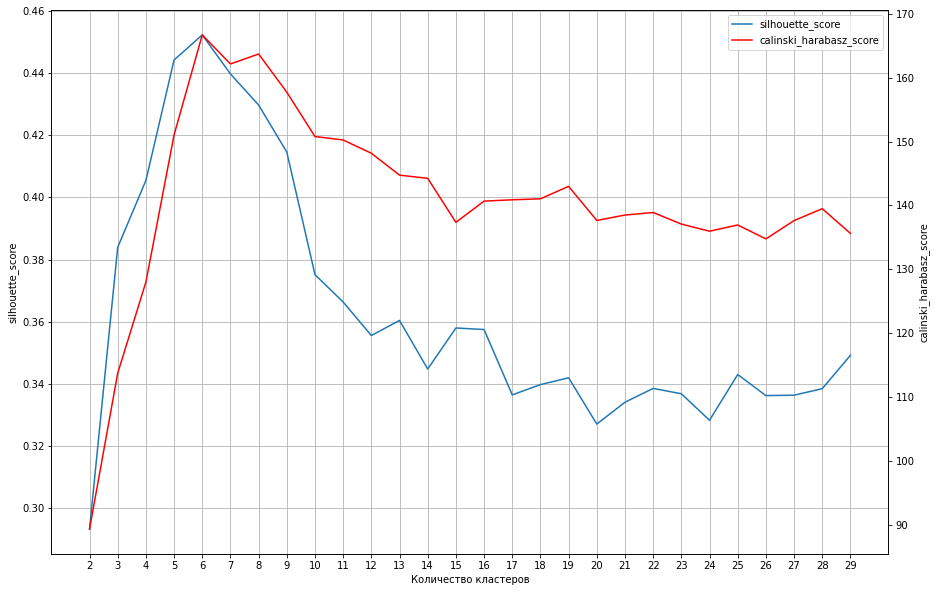

In [105]:
fig = plt.figure(figsize=(15, 10))
plot1, = plt.plot(n_clusters, s_scores, label='silhouette_score')
plt.xlabel('Количество кластеров')
plt.ylabel('silhouette_score')
plt.xticks(n_clusters)
plt.grid()
plt.twinx()
plot2, = plt.plot(n_clusters, c_scores, label='calinski_harabasz_score', color="red")
plt.ylabel('calinski_harabasz_score')
plt.legend(handles=[plot1, plot2]);

#### по Income

In [106]:
n_clusters = list(range(2,30))
s_scores = []
c_scores = []

for clstrs in n_clusters:    
    kmeansx = KMeans(n_clusters=clstrs)
    y_kmeansx = kmeansx.fit_predict(x2)

    s_scores.append(silhouette_score(x2, y_kmeansx))
    c_scores.append(calinski_harabasz_score(x, y_kmeansx))

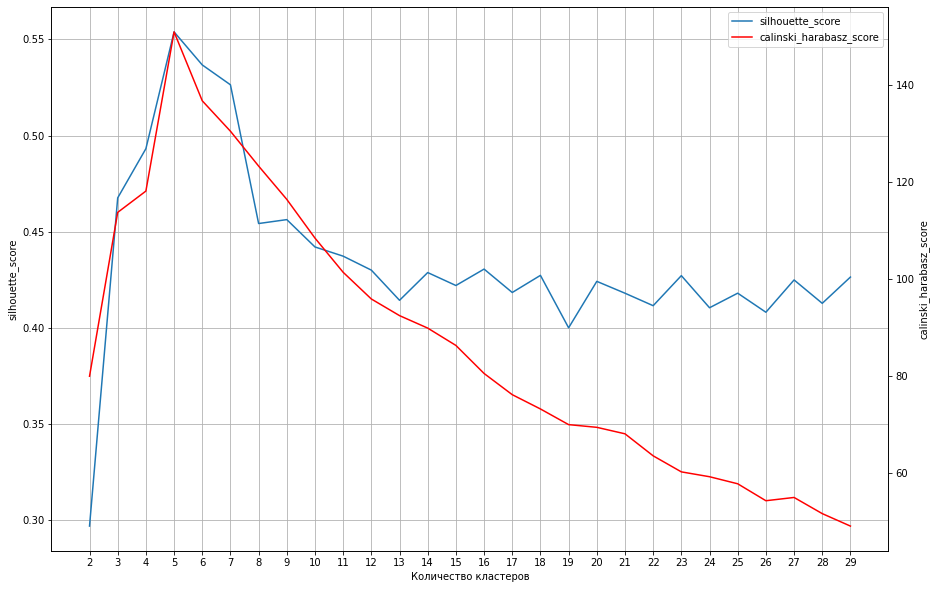

In [107]:
fig = plt.figure(figsize=(15, 10))
plot1, = plt.plot(n_clusters, s_scores, label='silhouette_score')
plt.xlabel('Количество кластеров')
plt.ylabel('silhouette_score')
plt.xticks(n_clusters)
plt.grid()
plt.twinx()
plot2, = plt.plot(n_clusters, c_scores, label='calinski_harabasz_score', color="red")
plt.ylabel('calinski_harabasz_score')
plt.legend(handles=[plot1, plot2]);

#### по Age

In [108]:
n_clusters = list(range(2,30))
s_scores = []
c_scores = []

for clstrs in n_clusters:    
    kmeansx = KMeans(n_clusters=clstrs)
    y_kmeansx = kmeansx.fit_predict(x3)

    s_scores.append(silhouette_score(x3, y_kmeansx))
    c_scores.append(calinski_harabasz_score(x, y_kmeansx))


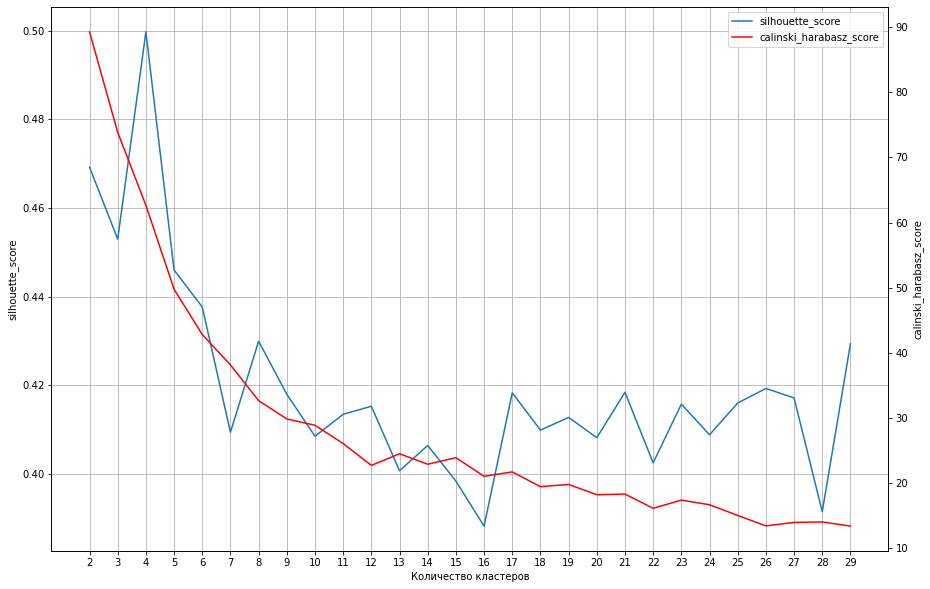

In [109]:
fig = plt.figure(figsize=(15, 10))
plot1, = plt.plot(n_clusters, s_scores, label='silhouette_score')
plt.xlabel('Количество кластеров')
plt.ylabel('silhouette_score')
plt.xticks(n_clusters)
plt.grid()
plt.twinx()
plot2, = plt.plot(n_clusters, c_scores, label='calinski_harabasz_score', color="red")
plt.ylabel('calinski_harabasz_score')
plt.legend(handles=[plot1, plot2]);